Meteorological data will be analyzed and visualized along the coast of northern Italy. During the experiment, we will first use the matplotlib library in Python to graphically process the data, and then call the SVM library in the scikit-learn library to perform regression analysis on the data, and finally draw our conclusions with the support of graphic analysis.

Hypothesis:

Is there any influence of the sea on the climate?

We like to hide by the sea in the summer to escape the intense heat inland. But how is the climate influenced by the sea?
In order to test it, I selected 10 coast cities in Italy. Then their weather data will be analyzed. Five cities are within 100 km from the sea, and the remaining 5 are 100-400 km from the sea.

The cities are:
Ferrara,
Torino,
Mantova,
Milano,
Ravenna,
Asti,
Bologna,
Piacenza,
Cesena,
Faenza

Once the system to be studied is defined, we need to create data sources to obtain the data required for the study. If you browse the Internet, you will find that many websites provide weather data from all over the world, and I select the Weather Map. Its URL is http://openweathermap.org/

In [1]:
import numpy as np
import pandas as pd
import datetime

User need to specify a city in the requested URL to get weather data for that city. I have already prepared the data.

In [2]:
df_ferrara = pd.read_csv('ferrara_270615.csv')
df_milano = pd.read_csv('milano_270615.csv')
df_mantova = pd.read_csv('mantova_270615.csv')
df_ravenna = pd.read_csv('ravenna_270615.csv')
df_torino = pd.read_csv('torino_270615.csv')
df_asti = pd.read_csv('asti_270615.csv')
df_bologna = pd.read_csv('bologna_270615.csv')
df_piacenza = pd.read_csv('piacenza_270615.csv')
df_cesena = pd.read_csv('cesena_270615.csv')
df_faenza = pd.read_csv('faenza_270615.csv')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser

Temperature Data Analysis

A very simple analysis method is to first analyze the trend of temperature changes in a day. I take the city of Milan as an example.

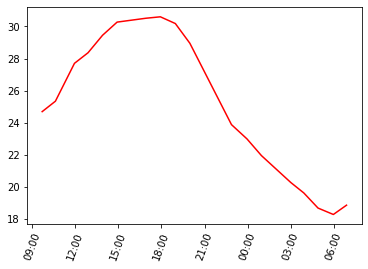

In [4]:
# Take out the temperature and date data we want to analyze
y1 = df_milano['temp']
x1 = df_milano['day']

# Convert date data to datetime format
day_milano = [parser.parse(x) for x in x1]

# Call the subplot function, fig is the image object, and ax is the coordinate axis object
fig, ax = plt.subplots()

# Adjust the x-axis coordinate scale to rotate it 70 degrees for easy viewing
plt.xticks(rotation=70)

# Format the time
hours = mdates.DateFormatter('%H:%M')

# Set the format of the X-axis display
ax.xaxis.set_major_formatter(hours)

# Draw the image, day_milano is the X-axis data, y1 is the Y-axis data, 'r' represents 'red'
ax.plot(day_milano ,y1, 'r')

Execute the above code and you will get the image. It can be seen from the figure that the temperature trend is close to a sinusoidal curve, and the temperature gradually rises from the morning, the highest temperature appears between 2:00 p.m.

The purpose of our data analysis is to try to explain whether we can assess how the ocean affects temperature, and whether it can affect temperature trends, so we look at temperature trends in several different cities at the same time. This is the only way to check that the analysis direction is correct. Therefore, we choose the three cities closest to the sea and the three cities farthest from the sea.

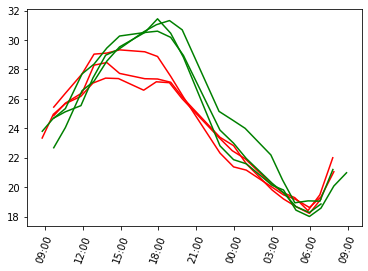

In [5]:
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_faenza['temp']
x2 = df_faenza['day']
y3 = df_cesena['temp']
x3 = df_cesena['day']
y4 = df_milano['temp']
x4 = df_milano['day']
y5 = df_asti['temp']
x5 = df_asti['day']
y6 = df_torino['temp']
x6 = df_torino['day']

# Convert date from string type to standard datetime type
day_ravenna = [parser.parse(x) for x in x1]
day_faenza = [parser.parse(x) for x in x2]
day_cesena = [parser.parse(x) for x in x3]
day_milano = [parser.parse(x) for x in x4]
day_asti = [parser.parse(x) for x in x5]
day_torino = [parser.parse(x) for x in x6]

# Call the subplots() function and redefine the fig, ax variables
fig, ax = plt.subplots()
plt.xticks(rotation=70)

hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)

#Here I need to draw three lines, so three sets of parameters, and 'g' stands for 'green'
ax.plot(day_ravenna,y1,'r',day_faenza,y2,'r',day_cesena,y3,'r')
ax.plot(day_milano,y4,'g',day_asti,y5,'g',day_torino,y6,'g')

The temperature curves for the three cities closest to the sea are in red, while the curves for the three cities farthest from the sea are in green.

The maximum temperature of the three cities closest to the sea is much lower than that of the three cities farthest from the sea, while the difference in minimum temperature seems to be small.

Do in-depth research along this direction, collect the highest and lowest temperatures of 10 cities, and use a linear graph to represent the relationship between the highest temperature point and the distance from the sea.

In [6]:
# dist is a list of distances between cities and the sea
dist = [df_ravenna['dist'][0],
    df_cesena['dist'][0],
    df_faenza['dist'][0],
    df_ferrara['dist'][0],
    df_bologna['dist'][0],
    df_mantova['dist'][0],
    df_piacenza['dist'][0],
    df_milano['dist'][0],
    df_asti['dist'][0],
    df_torino['dist'][0]
]

# temp_max is a list that stores the maximum temperature for each city
temp_max = [df_ravenna['temp'].max(),
    df_cesena['temp'].max(),
    df_faenza['temp'].max(),
    df_ferrara['temp'].max(),
    df_bologna['temp'].max(),
    df_mantova['temp'].max(),
    df_piacenza['temp'].max(),
    df_milano['temp'].max(),
    df_asti['temp'].max(),
    df_torino['temp'].max()
]

# temp_min is a list that stores the minimum temperature for each city
temp_min = [df_ravenna['temp'].min(),
    df_cesena['temp'].min(),
    df_faenza['temp'].min(),
    df_ferrara['temp'].min(),
    df_bologna['temp'].min(),
    df_mantova['temp'].min(),
    df_piacenza['temp'].min(),
    df_milano['temp'].min(),
    df_asti['temp'].min(),
    df_torino['temp'].min()
]

Draw the highest temperature

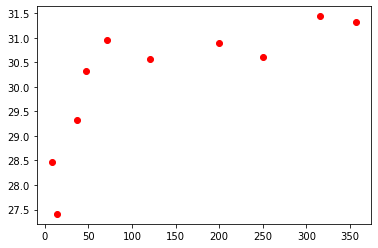

In [7]:
fig, ax = plt.subplots()
ax.plot(dist,temp_max,'ro')

Now I can confirm that the hypothesis that the ocean has some influence on the weather data is correct (at least to this day). If you take a closer look at the above picture, you will find that the influence of the ocean decays quickly, and the temperature has climbed to a high level 60 to 70 kilometers away from the sea.

It is interesting to use the linear regression algorithm to obtain two straight lines representing two different temperature trends. We can use the SVR method of the scikit-learn library.

In [8]:
from sklearn.svm import SVR

# dist1 is a collection of cities near the sea, dist2 is a collection of cities far away from the sea
dist1 = dist[0:5]
dist2 = dist[5:10]

# Change the structure of the list, dist1 is now a collection of 5 lists
dist1 = [[x] for x in dist1]
dist2 = [[x] for x in dist2]

# temp_max1 is the corresponding maximum temperature of the city in dist1
temp_max1 = temp_max[0:5]
# temp_max2 is the corresponding maximum temperature of the city in dist2
temp_max2 = temp_max[5:10]

# call the SVR function, specifying a linear fitting function in the parameter
# And set C to 1000 to try to fit the data 
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)

# Add data and fit（This step may take a long time, about 10 minutes）
svr_lin1.fit(dist1, temp_max1)
svr_lin2.fit(dist2, temp_max2)

xp1 = np.arange(10,100,10).reshape((9,1))
xp2 = np.arange(50,400,50).reshape((7,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)

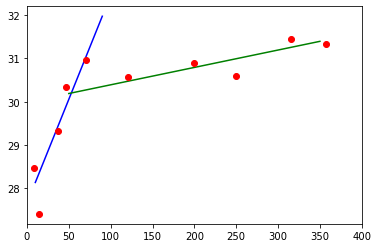

In [9]:
# Limit the value range of the x-axis
fig, ax = plt.subplots()
ax.set_xlim(0,400)

ax.plot(xp1, yp1, c='b', label='Strong sea effect')
ax.plot(xp2, yp2, c='g', label='Light sea effect')
ax.plot(dist,temp_max,'ro')

As you can see above, within 60 kilometers from the sea, the temperature rises rapidly, from 28 degrees to 31 degrees, and then the growth rate gradually slows down (if it continues to grow), and there will be a small increase for longer distances. These two trends can be represented by two straight lines respectively. The expression of the straight line is: y=ax+by=ax+b where a is the slope and b is the intercept.

In [10]:
print(svr_lin1.coef_) 
print(svr_lin1.intercept_) 
print(svr_lin2.coef_)
print(svr_lin2.intercept_)

[[0.04794118]]
[27.65617647]
[[0.00401274]]
[29.98745222]


Might consider the point where these two lines intersect as the dividing point between areas that are influenced by the ocean and areas that aren't, or at least where the ocean's influence is weaker.

[x,y] = [ 53 , 30 ]


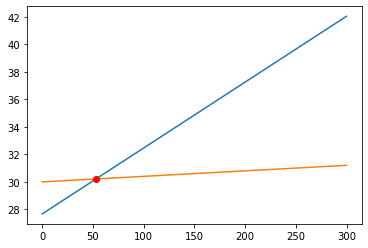

In [11]:
from scipy.optimize import fsolve

# The first fitted straight line is defined
def line1(x):
    a1 = svr_lin1.coef_[0][0]
    b1 = svr_lin1.intercept_[0]
    return a1*x + b1

# A second fitted straight line is defined
def line2(x):
    a2 = svr_lin2.coef_[0][0]
    b2 = svr_lin2.intercept_[0]
    return a2*x + b2

# defines a function to find the x-coordinate of the intersection point of two lines
def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1,line2,0.0)
print("[x,y] = [ %d , %d ]" % (result,line1(result)))

x = np.linspace(0,300,31)
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')



So I can say that the average distance (for that day) over which the ocean has an effect on air temperature is 53 kilometers. Now, I need to turn to the analysis of the minimum air temperature.

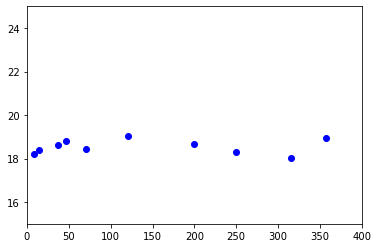

In [12]:
plt.axis((0,400,15,25))
plt.plot(dist,temp_min,'bo')

In this example, it is clear that the lowest temperature at night or around 6 am in those cities has nothing to do with the ocean.

If I remember correctly, when I was in high school, the teacher taught everyone that the ocean can moderate the low temperature, or that the ocean releases the heat absorbed during the day at night. But that's not the case from what I have seen.